# Rotation matrices: moving molecules. Coordinate transform as rotation.

In [1]:
# import all python add-ons etc that will be needed later on
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
init_printing()                      # allows printing of SymPy results in typeset maths format
plt.rcParams.update({'font.size': 14})  # set font size for plots

## 7 Rotation
Rotating the image of a molecular structure viewed on the computer screen can be easily achieved with a matrix. In two dimensions, the rotation can be defined as moving the co- ordinates of the molecule about an axis perpendicular to the plane of the page (x-y plane) by $\theta$ radians, relative to the original axes as shown in Figure 29. Alternatively, the axes themselves can be rotated.

The atom $a$, on the benzene molecule is shown at $(x_1, y_1)$ relative to the initial axes labelled $x$ and $y$, but in the new axes (labelled $x_R$ and $y_R$) it is moved to coordinate $(x_{R1}, y_{R1})$ by rotating the axes anticlockwise by $\theta$. From the viewpoint of the new axes, seen by rotating them anticlockwise so that axis $x_{R1}$ appears horizontal, the molecule appears to have rotated clockwise by $\theta$ so that atoms $a$ and $b$ now appear to be horizontal. Alternatively, the axes can be fixed and the molecule rotated clockwise about the origin of the axes, as in the right-hand figure, which seems more natural.

![Drawing](matrices-fig29.png)

Figure 29. Two equivalent views of rotating a molecule. Left: The axes rotate $\theta$ anticlockwise. The point '$a$' has coordinates $(x_1, y_1) \equiv (x_{R1} , y_{R2})$ in the two sets of axes. Right: The molecule is rotated $\theta$ clockwise.
_______

If the atom $a$, has coordinates represented as a vector $\displaystyle \begin {bmatrix} x_1 \\ y_1 \end{bmatrix}$ in the two-dimensional basis set of $(x, y)$ then the new coordinates when rotating the molecule clockwise are $x_{R1} = x_1\cos(\theta) + y_1\sin(\theta)$ and $y_{R1} = -x_1\sin(\theta) + y_1\cos(\theta)$ which is, in matrix form, 

$$\displaystyle \qquad\qquad\begin {bmatrix} x_{R1} \\ y_{R1} \end{bmatrix} =R_\theta \begin {bmatrix} x_1 \\ y_1 \end{bmatrix} \qquad\qquad\qquad\qquad\text{(10)}$$ 

where 

$$\displaystyle \qquad\qquad\begin {bmatrix} \cos(\theta) & \sin(\theta) \\ -\sin(\theta) & \cos(\theta) \end{bmatrix}\qquad\qquad\qquad\qquad\text{(11)}$$

is the two-dimensional rotation matrix, which is a unitary and orthogonal matrix. Does this rotation matrix make sense? Let us try some with numbers. If $\theta = 0$ then nothing should happen and $x_1$ should be the same as $x_{R1}$, and similarly for $y$ values, because $\sin(0) = 0$ and $\cos(0) = 1$. If $\theta = \pi$ radians ($180^\text{o}$) then $x_{R1} = -x_1$ and $y_{R1} = -y_1$ so the molecule is inverted by rotating by $180^\text{o}$.

If rotation is by $90^\text{o}$ then $x \to y$ and $y \to -x$ because $\cos(\pi/2) = 0$ and $\sin(\pi/2) = 1$. The rotation matrices for $180^\text{o}$ or $\pi$ radian, $90^\text{o} \equiv \pi/2$ radian, and $45^\text{o}$ rotation are

$$\displaystyle R_{180}=\begin {bmatrix} -1 &0 \\ 0 & -1 \end{bmatrix}, \quad R_{90}=\begin {bmatrix} 0 &1 \\ -1 & 0 \end{bmatrix},\quad  R_{45}=\frac{1}{\sqrt{2}}\begin {bmatrix} 1 &1 \\ -1 & -1 \end{bmatrix}  $$

The effect we observe on rotation is that the molecule will appear to move in an arc around $(0, 0)$ or the centre of the axes; the arc atom '$a$' follows has a radius $\sqrt{x_1^2+x_2^2}\equiv\sqrt{x_{R1}^2+x_{R2}^2}$. If we wanted the molecule to rotate about its own centre then we would have to place the centre of the axes at the centre of the molecule; this can be done by subtracting the coordinates of the centre from each atom, rotating the molecule then replacing these co- ordinates onto every atom.

Using Sympy the rotation matrix is 

In [2]:
theta, a, b  = symbols('theta, a, b')  # use Sympy
R = Matrix([ [cos(theta),sin(theta)],[-sin(theta),cos(theta)] ])
v = Matrix([a,b])    # define a vector 
R*v                  # rotates about zero.  Unlike numpy * is matrix rotation

⎡a⋅cos(θ) + b⋅sin(θ) ⎤
⎢                    ⎥
⎣-a⋅sin(θ) + b⋅cos(θ)⎦

Note that the vector is rotated about zero not the first coordinate $a$. To rotate about $a$ the vector must be changed to $[0,b-a]$ and then $a$ added back to the resulting rotated vector.

![Drawing](matrices-fig30.png)

Figure 30. Rotating a line or vector (shown as an arrow) by $60^{\text{o}}\equiv\pi/3$ clockwise about the origin.

_____

To rotate in three directions, three $3 \times 3$ matrices are needed because rotation about each axis can be performed separately. By multiplication we can combine these into a single matrix, but the elements are complicated and it is easier to use them separately as each has the simple sine/cosine pattern similar to equation 11. Next, the axes and rotation angles have to be defined; however, different authors use different labelling systems therefore when doing three-dimensional rotations it is important to notice how the axes are defined. It does not matter which labelling you use as long as you are consistent and know what they are. We use the Euler angles defined in the same manner as Goldstein (1980), the first rotation is anticlockwise looking down the z-axis, the next two rotations are anti-clockwise about the new axes B then C that are formed as shown in Figure 31. The original axes are indicated in the figure.

The first rotation is around the axis $A$ though angle $\varphi$. The matrix is

$$\displaystyle \qquad\qquad\begin {bmatrix} \cos(\varphi) &\sin(\varphi) & 0 \\ -\sin(\varphi) & \cos(\varphi) \\ 0 & 0 & 1 \end{bmatrix} \qquad\qquad\qquad\qquad\text{(13)}$$

![Drawing](matrices-fig31.png)

Figure 31. Ordering of rotations. (Figure based on Goldstein 1980, chapter 4)
_____

The second is round the axis labelled $B$ and is by $\theta$ also shown in Figure 31. The matrix is

$$\displaystyle \qquad\qquad B(\theta)=\begin {bmatrix} 1 & 0 & 0\\ 0 &\cos(\varphi) &\sin(\varphi)  \\ 0 &-\sin(\varphi) & \cos(\varphi)  \end{bmatrix} \qquad\qquad\qquad\qquad\text{(14)}$$

The final rotation by angle $\psi$ is about the axis labelled $C$, giving

$$\displaystyle \qquad\qquad C(\psi)=\begin {bmatrix} 1 & 0 & 0\\ 0 &\cos(\varphi) &\sin(\varphi)  \\ 0 &-\sin(\varphi) & \cos(\varphi)  \end{bmatrix} \qquad\qquad\qquad\qquad\text{(15)}$$

and the full rotation matrix is the triple multiplication $\pmb{R} = \pmb{ABC}$.

A point $(x, y, z)$ whose coordinates are defined by a column matrix after anticlockwise rotation by $\psi$, then $\theta$, and then $\varphi$ radians is now at

$$\displaystyle \qquad\qquad C(\psi)=\begin {bmatrix} x_R \\ y_R  \\ z_R  \end{bmatrix} = A(\psi)B(\theta)C(\varphi)\begin {bmatrix} x_1\\ y_1  \\ z_1  \end{bmatrix} \qquad\qquad\qquad\qquad\text{(16)}$$

and this is just about all you need to know about rotating molecules!

An algorithm in Python using rotation matrices to rotate a molecules image starts by defining the coordinates, in this example of ethanol. These coordinates are

$$\displaystyle \begin{array}{lll}\\
C1= \begin{bmatrix} -0.968& -0.008& -0.167\end{bmatrix} & \text{carbon in CH2OH} \\
Ox= \begin{bmatrix} -0.953& 1.395 & -0.142 \end{bmatrix} & \text{O atom}  \\
H1 =\begin{bmatrix}  0.094& -0.344& -0.200 \end{bmatrix} &\text{H on C1}\\
C2= \begin{bmatrix} -1.683& -0.523& 1.084 \end{bmatrix} &\text{Carbon in CH3}\\ 
H2= \begin{bmatrix} -1.490& -0.319& -1.102 \end{bmatrix} &\text{H on C1}\\
H3= \begin{bmatrix} -1.842& 1.688 & -0.250 \end{bmatrix} &\text{H on O atom}\\
H4= \begin{bmatrix} -1.698& -1.638& 1.101 \end{bmatrix} &\text{H on C2}\\
H5= \begin{bmatrix} -1.171& -0.174& 2.011 \end{bmatrix} &\text{H on C2}\\
H6= \begin{bmatrix} -2.738& -0.167& 1.117 \end{bmatrix} &\text{H on C2}\\ \end{array} $$

The input to the procedure must have the three rotation angles and the coordinates of the molecule. A graph of the molecule will be plotted in the usual chemical way after rotation. The labelled structure is shown in Figure 32.

![Drawing](matrices-fig32.png)

Figure 32 Ethanol, with H atoms replaced by their labels.
_______

If a molecule is plotted only as points showing where the atoms are, it will usually be impossible to decide what its structure is; therefore bonds must be drawn, and this means joining up the atoms in a sensible way with lines. A 'connectivity' list showing which atoms are joined to which has to be made, and this might be done automatically by examining the distances between atoms and deciding which atoms are connected to which depending upon their separation. Ethanol is sufficiently small that the list of atoms and lines between them can be made directly so that the 'pen' is not lifted from the 'paper' when drawing the structure. Clearly, this means going over the same bonds twice and back and forth between some atoms many times. There are several ways of doing this depending on where you start, but the list of atoms below will draw the molecule. Notice how some atoms have to be included more than once.

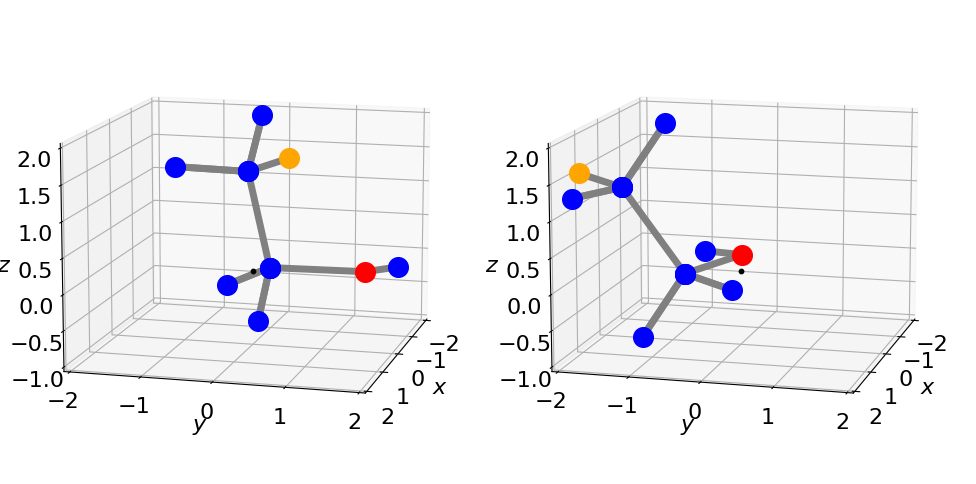

In [3]:
# Algorithm. Rotating a Molecule
from mpl_toolkits.mplot3d import Axes3D    # import ability to plot in 3D

fig = plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 16})     # set font size for plots
ax0 = plt.subplot(121,projection='3d')     # set 3D projection for two plots side by side
ax1 = plt.subplot(122,projection='3d')

#------------------------------
def rotate_molecule(a, b, c):  # input order is psi, theta, phi
    psi   = a*np.pi/180.0  
    theta = b*np.pi/180.0 
    phi   = c*np.pi/180.0      # make into radians # eqns (13) to (15), follow
    
    rot_psi   = np.array( [[ np.cos(psi),np.sin(psi),0 ], [ -np.sin(psi),np.cos(psi),0 ], [ 0,0,1]] )
                       
    rot_theta = np.array( [[ 1,0,0], [0, np.cos(theta),np.sin(theta) ], [0, -np.sin(theta), np.cos(theta) ] ] )
    
    rot_phi   = np.array( [[ np.cos(phi),np.sin(phi),0 ], [ -np.sin(phi),np.cos(phi),0 ], [ 0,0,1]] )
    
    return rot_psi @ ( rot_theta @ rot_phi )   # @ is matrix multiplication
#-------------------------------   

def plot_mol(M,ax):
    n = len(M)
    for i in range(n):
        col='blue'
        if i == 1 : col='red'
        if i == n-1 : col='orange'
        ax.scatter( M[i,0], M[i,1], M[i,2], s = 200, marker = 'o',color=col )
        if i < n-1:
            ax.plot([M[i,0],M[i+1,0]  ], [M[i,1],M[i+1,1] ], [M[i,2],M[i+1,2] ],color='grey' ,linewidth=5  )
#-------------------------------
def remove_grid(ax):                  # use to make pretty plot
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    # make the grid lines transparent
    ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
#--------------------------------
def add_labels(ax):
    ax.set_xlim([-2,2])
    ax.set_ylim([-2,2])
    ax.set_zlim([-1,2])
    ax.set_xticks([-2,-1,0,1,2])
    ax.set_yticks([-2,-1,0,1,2])
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_zlabel(r'$z$')
#---------------------------------

C1= [ -0.968, -0.008, -0.167 ]    # define coordinaates
Ox= [ -0.953, 1.395 , -0.142 ]  
H1= [ 0.094 , -0.344, -0.200 ]  
C2= [ -1.683, -0.523,  1.084 ] 
H2= [ -1.490, -0.319, -1.102 ]
H3= [ -1.842, 1.688 , -0.250 ]  
H4= [ -1.698, -1.638,  1.101 ]  
H5= [ -1.171, -0.174,  2.011 ]  
H6= [ -2.738, -0.167,  1.117 ] 

# put the list of coordinates given above here.
# mol is the name of atom list to draw molecule

mol= np.array([H3,Ox,C1,H2,C1,H1,C1,C2,H4,C2,H5,C2,H6] )  # connectivity list for drawing

psi   = 0.0  # angles to rotate 
theta = 0.0
phi   = 70.0

arot = rotate_molecule( psi, theta, phi) # calc rotation matrix 

new =[mol]             # copy array

new = mol @ arot       # rotate coordinates    
    
#remove_grid(ax0)      # remove grid when plotting and add labels
#remove_grid(ax1)

add_labels(ax0)
add_labels(ax1)
ax0.view_init(12, 15)
ax1.view_init(12, 15)

plot_mol(mol,ax0)
plot_mol(new,ax1)
ax0.scatter(0,0,0,s=10,color='black')   # rotation about  point (0,0,0)
ax1.scatter(0,0,0,s=10,color='black')
#ax0.set_proj_type('ortho')              # type of projection
#ax1.set_proj_type('ortho')
plt.tight_layout()
plt.show()

Figure 33. The left structure shows the original orientation $(0, 0, 0)$, and right after rotation by $\psi = 0, \theta = 0$ and $\varphi = 70^\text{o}$ using the procedure in Algorithm 7.4. The small black dot is at zero the point about which rotation occurs.

_____


## 8 Using Jacobians to calculate derivatives in polar coordinates

Another form of matrix 'rotation' is a coordinate transformation, and to do this the Jacobian, which was introduced in Chapter 4, can be used. In that chapter, it was used to simplify integrations by changing variables and a similar process can be followed when solving differential equations: it is often convenient to change from Cartesian coordinates to polar ones. For example, in two dimensions the Schroedinger equation for a particle on a ring, which is 

$$\displaystyle -\frac{\hbar^2}{2m}\left(\frac{\partial^2\psi}{\partial x^2}+\frac{\partial^2\psi}{\partial y^2}  \right) =E\psi$$

is difficult to solve using Cartesian coordinates but easier in plane polar coordinates $r, \theta$, see Chapter 10.5.9. Similarly the three - dimensional equation, such as is required to calculate the energy levels and wavefunctions for the H atom, is easier in spherical polar coordinates than in $x, y$, and $z$.

In plane polar coordinates the conversion from $d^2/dx^2$ and $d^2/dy^2$ to $d^2/dr^2$ and $d^2/d\theta^2$ can be worked out starting with the conversions $x = r\cos(\theta), y = r\sin(\theta)$ and $r^2 = x^2 + y^2$. However, the calculation of the second derivative is hard; see question Q3.114. Using matrices, the calculation of $\partial/\partial x$ and $\partial/\partial y$ in terms of derivatives of $r$ and $\theta$ uses a Jacobian matrix. This first derivative is then used to obtain the second. The method is:

**(i)** Form the matrix equation Polar derivatives in $(r, \theta)$ = Jacobian $\times$ Cartesian derivatives in $(x, y)$, which can be represented as $\pmb{P} = \pmb{JC}$, where $\pmb{J}$ is the Jacobian matrix, $\pmb{P}$ a column vector of derivatives in polar coordinates and $\pmb{C}$ a column vectors of Cartesian derivatives.

**(ii)** Invert the Jacobian matrix and left multiply both sides of the equation by $\pmb{J}^{-1}$ to obtain the derivatives in $(x, y)$. This step is

$$\displaystyle \pmb{J}^{-1}\pmb{P}=\pmb{J}^{-1}\pmb{JC}=\pmb{C} \quad \text{or}\quad \pmb{C}=\pmb{J}^{-1}\pmb{P} $$

In plane polar coordinates there are only two derivatives, therefore the matrix equation is $\pmb{P} = \pmb{JC}$ and if this acts on a function $f$ then

$$\displaystyle \begin{bmatrix} \partial f/\partial r\\ \partial f/\partial \theta\end{bmatrix}=\begin{bmatrix} \partial x/\partial r &\partial y/\partial r\\ \partial x/\partial \theta &\partial y/\partial \theta \end{bmatrix}\begin{bmatrix} \partial f/\partial x\\\partial f/\partial y \end{bmatrix} $$

where the Jacobian $\pmb{J}$ is the square matrix. Calculating this gives

$$ \displaystyle \begin{bmatrix} \cos(\theta) &\sin(\theta)\\ -r\sin(\theta)  &r\cos(\theta)  \end{bmatrix}  $$

Working out $\pmb{J}^{-1}$ can be done using Sympy, but it is easier to look up the inverse of a $2 \times 2$ matrix which defined in Section 5.7. This gives

$$ \displaystyle \pmb{J}^{-1}=\begin{bmatrix} \cos(\theta) &-\sin(\theta)/r\\ \sin(\theta)  &\cos(\theta)/r  \end{bmatrix}  $$

and the equation $\pmb{C}=\pmb{J}^{-1}\pmb{P}$ is

$$\displaystyle \begin{bmatrix} \partial f/\partial x\\ \partial f/\partial y\end{bmatrix}=\begin{bmatrix} \cos(\theta) &-\sin(\theta)/r\\ \sin(\theta)  &\cos(\theta)/r  \end{bmatrix}\begin{bmatrix} \partial f/\partial r\\\partial f/\partial \theta \end{bmatrix} $$

$$\displaystyle \qquad\qquad\begin{bmatrix} \partial f/\partial x\\ \partial f/\partial y\end{bmatrix}=\begin{bmatrix}  \displaystyle \cos(\theta)\frac{\partial}{\partial r}f -\sin(\theta)\frac{\partial}{r\partial \theta}f\\  \displaystyle\sin(\theta)\frac{\partial}{\partial r}f  +\cos(\theta)\frac{\partial}{r\partial \theta}f  \end{bmatrix} \qquad\qquad\qquad\qquad\text{(17)}$$

which gives the individual first derivatives as

$$\displaystyle \frac{\partial f}{\partial x}=\cos(\theta)\frac{\partial}{\partial r}f -\sin(\theta)\frac{\partial}{r\partial \theta}f \qquad \frac{\partial f}{\partial y} = \sin(\theta)\frac{\partial}{\partial r}f  +\cos(\theta)\frac{\partial}{r\partial \theta}f$$

If the function $f$ is defined, the gradients of a curve in $(r , \theta)$ can be found in $(x , y)$. Suppose, therefore, that the curve is $r = \sin(\theta)$, which is the equation of a circle centred at $x = 0, y = 1$, then the function is $f = r/\sin(\theta) - 1$ and the derivatives are found by putting $f$ into equation 17 and differentiating. The result, after some simplification, is

$$\displaystyle \frac{\partial}{\partial x}f=\frac{2\cos(\theta)}{\sin(\theta)} \qquad \text{and}\qquad \frac{\partial}{\partial y}f=\frac{1-2\cos^2(\theta)}{\sin^2(\theta)} $$

Returning to the calculation of the second derivatives, ($f_{xx}+f_{yy})$ which is $\displaystyle  \frac{\partial^2}{\partial x^2}f+\frac{\partial^2}{\partial y^2}f$ are found with each derivative a function $f$ and substituting into equation 17.

The calculation using Sympy is shown below and the result for the operator to convert from Cartesian to plane polar coordinates is 

$$\displaystyle \frac{\partial^2}{\partial x^2}+ \frac{\partial^2}{\partial y^2}\equiv \frac{\partial^2}{\partial r^2}+\frac{1}{r}\frac{\partial}{\partial r} + \frac{1}{r^2}\frac{\partial^2}{\partial \theta^2}$$

In [4]:
# Algorthim: Algebraic calculation using a Jacobian using Sympy

r, theta, fx, fy, P, fxx, fyy = symbols('r, theta, fx, fy, P, fxx, fyy')

fx = r*cos(theta)
fy = r*sin(theta)
f  = Function('f')(r,theta)         # define some function f in r and theta
J  = Matrix([ [diff(fx,r),diff(fy,r)] , [diff(fx,theta),diff(fy,theta)]]  )  # Jacobian
J

⎡ cos(θ)     sin(θ) ⎤
⎢                   ⎥
⎣-r⋅sin(θ)  r⋅cos(θ)⎦

In [5]:
P = Matrix( [ diff(f,r),diff(f,theta) ] )
P

⎡∂          ⎤
⎢──(f(r, θ))⎥
⎢∂r         ⎥
⎢           ⎥
⎢∂          ⎥
⎢──(f(r, θ))⎥
⎣∂θ         ⎦

In [6]:
C = J**(-1) * P
simplify(C)

⎡                            ∂          ⎤
⎢                     sin(θ)⋅──(f(r, θ))⎥
⎢       ∂                    ∂θ         ⎥
⎢cos(θ)⋅──(f(r, θ)) - ──────────────────⎥
⎢       ∂r                    r         ⎥
⎢                                       ⎥
⎢                            ∂          ⎥
⎢                     cos(θ)⋅──(f(r, θ))⎥
⎢       ∂                    ∂θ         ⎥
⎢sin(θ)⋅──(f(r, θ)) + ──────────────────⎥
⎣       ∂r                    r         ⎦

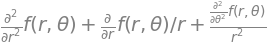

In [7]:
fxx = diff(C[0],r)*cos(theta)-diff(C[0],theta)*sin(theta)/r     # second order derivatives
fyy = diff(C[1],r)*sin(theta)+diff(C[1],theta)*cos(theta)/r
simplify(fxx+fyy )